In [8]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
training_df=pd.read_csv('Google_Stock_Price_Train.csv')

In [13]:
training_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


## EDA and Data Cleaning

In [14]:
training_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [15]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [16]:
df1=training_df.copy()
df1.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [17]:
df1['Date']=pd.to_datetime(df1['Date'])
df1.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [18]:
df1['Date'].describe()

C:\Users\sivas\AppData\Local\Temp\ipykernel_20012\4270539849.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['Date'].describe()


count                    1258
unique                   1258
top       2012-01-03 00:00:00
freq                        1
first     2012-01-03 00:00:00
last      2016-12-30 00:00:00
Name: Date, dtype: object

##### It containes data from 2012-Jan  to 2016-Dec

In [19]:
df1=df1.set_index('Date')
df1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


## Setting the frequency of the stock prices to buissness days

In [20]:
df1.asfreq('b')
df1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [21]:
df1.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

#### Data is completly clean and has no null values

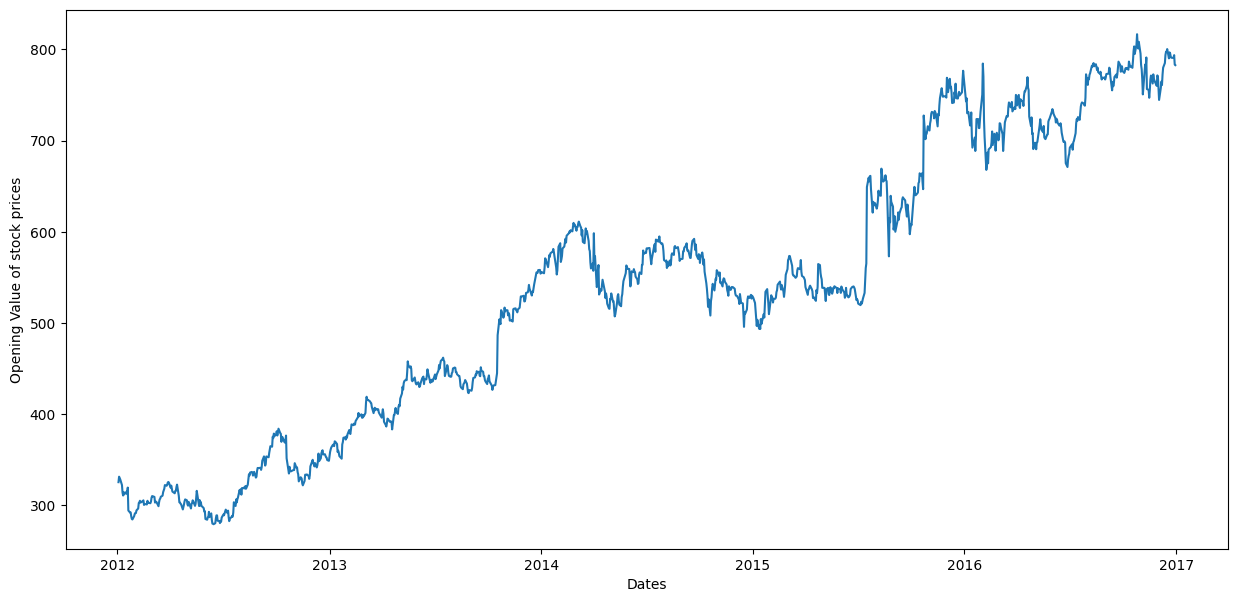

In [22]:
plt.figure(figsize=(15,7))
plt.plot(df1['Open'])
plt.xlabel('Dates')
plt.ylabel('Opening Value of stock prices')
plt.show()

## Preparing Data for RNN Model

In [23]:
training_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [24]:
x=training_df['Open']
x=pd.DataFrame(x)
x

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


### Min-Max Scaler to scale between 0-1

In [25]:
mn=MinMaxScaler()

In [26]:
x=mn.fit_transform(x)
x

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [27]:
len(x)

1258

### Data Preprocessing [Creating Time Stamp]

In [28]:
x_train=[]
y_train=[]

In [29]:
for i in range(60, 1258):
    x_train.append(x[i-60:i,0])
    y_train.append(x[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [31]:
x_train.shape

(1198, 60)

In [32]:
y_train.shape

(1198,)

### Reshaping

In [33]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [34]:
x_train.shape

(1198, 60, 1)

## Building Model

In [35]:
model=Sequential()

In [36]:
model.add(LSTM(units=50,return_sequences = True,input_shape=(60,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [38]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [39]:
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 16s 96ms/step - loss: 0.0383
Epoch 2/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0078
Epoch 3/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0040
Epoch 13/100
38/38 [

In [40]:
test_df=pd.read_csv('Google_Stock_Price_Test.csv')
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [41]:
test_df.shape

(20, 6)

In [42]:
real_stock_price=test_df['Open']
real_stock_price

0     778.81
1     788.36
2     786.08
3     795.26
4     806.40
5     807.86
6     805.00
7     807.14
8     807.48
9     807.08
10    805.81
11    805.12
12    806.91
13    807.25
14    822.30
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, dtype: float64

In [43]:
df=pd.concat([training_df,test_df],axis=0)

In [44]:
df.shape

(1278, 6)

In [45]:
test=df['Open']

In [46]:
inputs = test[len(df['Open']) - len(test_df['Open']) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [47]:
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [48]:
inputs=mn.transform(inputs)

C:\Users\sivas\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [49]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [50]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [51]:
X_test.shape

(20, 60, 1)

In [52]:
predicted_stock_price = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [53]:
predicted_stock_price = mn.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[768.9506 ],
       [766.39856],
       [766.03796],
       [766.95807],
       [769.7281 ],
       [774.8878 ],
       [780.15967],
       [783.00476],
       [783.8861 ],
       [783.80743],
       [783.4592 ],
       [783.043  ],
       [782.7209 ],
       [783.02313],
       [783.8207 ],
       [787.6119 ],
       [793.7902 ],
       [800.89355],
       [805.54236],
       [803.27014]], dtype=float32)

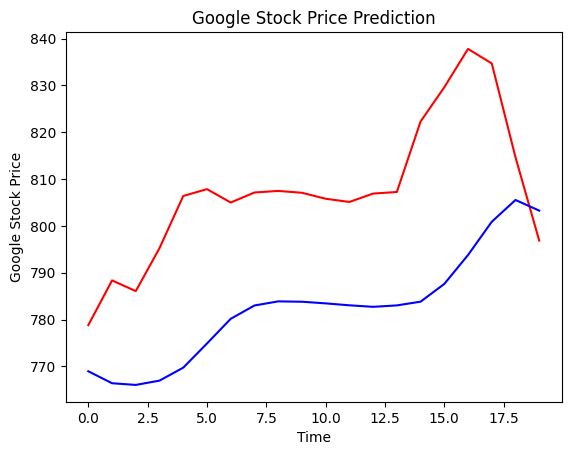

In [54]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mean_squared_error(real_stock_price,predicted_stock_price)

756.0941569714188